In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as matplt
matplt.rcParams["figure.figsize"]=(20,10)

In [134]:
dataFrame = pd.read_csv("Bengaluru_House_Data.csv")
dataFrame.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [135]:
dataFrame.shape

(13320, 9)

In [136]:
dataFrame.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [137]:
df2 = dataFrame.drop(["area_type","society","balcony","availability"],axis="columns")
df2.shape

(13320, 5)

In [138]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [139]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [140]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [141]:
df3.shape

(13246, 5)

In [142]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [143]:
df3['BHK'] = df3["size"].apply(lambda s :  int(s.split(' ')[0]))

<ipython-input-143-d99563cfa38f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3["size"].apply(lambda s :  int(s.split(' ')[0]))


In [144]:
df3.head()

location       size total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [145]:
df4 = df3.drop(["size"],axis="columns")
df4.head()

location total_sqft  bath   price  BHK
0  Electronic City Phase II       1056   2.0   39.07    2
1          Chikka Tirupathi       2600   5.0  120.00    4
2               Uttarahalli       1440   2.0   62.00    3
3        Lingadheeranahalli       1521   3.0   95.00    3
4                  Kothanur       1200   2.0   51.00    2

In [146]:
df4["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [147]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [148]:
def is_float(val):
    try:
        float(val)
    except:
        return False
    return True

In [149]:
df4[~df4["total_sqft"].apply(is_float)].head(10)

location      total_sqft  bath    price  BHK
30            Yelahanka     2100 - 2850   4.0  186.000    4
122              Hebbal     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar     1042 - 1105   2.0   54.005    2
165            Sarjapur     1145 - 1340   2.0   43.490    2
188            KR Puram     1015 - 1540   2.0   56.800    2
410             Kengeri  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road     1195 - 1440   2.0   63.770    2
648             Arekere       4125Perch   9.0  265.000    9
661           Yelahanka     1120 - 1145   2.0   48.130    2
672        Bettahalsoor     3090 - 5002   4.0  445.000    4

In [150]:
def convert_range_to_num(val):
    tokens = val.split("-")
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(val)
    except:
        return None

In [151]:
convert_range_to_num("2100 -     3500")

2800.0

In [152]:
df5 = df4.copy()
df5["total_sqft"] = df5["total_sqft"].apply(convert_range_to_num)
df5[~df5["total_sqft"].apply(is_float)]
df5.loc[410]

location      Kengeri
total_sqft        NaN
bath              1.0
price            18.5
BHK                 1
Name: 410, dtype: object

 Feature Extraction

In [153]:
df6 = df5.copy()
df6["price_per_sqft"]= df6["price"]*100000/df6["total_sqft"]
df6.head()

location  total_sqft  bath   price  BHK  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

In [154]:
len(df6["location"].unique())

1304

In [155]:
df6.location = df6.location.apply(lambda x: x.strip()) #remove extra space from beginning and end in location
location_stat = df6.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [156]:
location_less_than_10 = location_stat[location_stat<=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [157]:
#reduce dimension 
#taged the given addresses with frequency less then 10 with "others"
#In this way we reduce the 1304 locations to 242 location through dimension reduction
df6.location = df6.location.apply(lambda x: "other" if x in location_less_than_10 else x)
len(df6.location.unique())


242

In [158]:
df6.head(10)

location  total_sqft  bath   price  BHK  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000
5                Whitefield      1170.0   2.0   38.00    2     3247.863248
6          Old Airport Road      2732.0   4.0  204.00    4     7467.057101
7              Rajaji Nagar      3300.0   4.0  600.00    4    18181.818182
8              Marathahalli      1310.0   3.0   63.25    3     4828.244275
9                     other      1020.0   6.0  370.00    6    36274.509804

Outlier Removal Technique

In [159]:
# outlier - locations where single room is below the threshold( which is rare (outlier)) 
df6[df6.total_sqft/df6.BHK<300].head()

location  total_sqft  bath  price  BHK  price_per_sqft
9                 other      1020.0   6.0  370.0    6    36274.509804
45           HSR Layout       600.0   9.0  200.0    8    33333.333333
58        Murugeshpalya      1407.0   4.0  150.0    6    10660.980810
68  Devarachikkanahalli      1350.0   7.0   85.0    8     6296.296296
70                other       500.0   3.0  100.0    3    20000.000000

In [160]:
df6.shape

(13246, 6)

In [161]:
df7 = df6[~(df6.total_sqft/df6.BHK<300)]
df7.shape

(12502, 6)

In [162]:
#outlier - locations wherethe rate of properties is extremely high or extremely low, which is rare in city like bengaluru
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [163]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key,subDf in df.groupby("location"):
        mean = np.mean(subDf.price_per_sqft)
        standardD = np.std(subDf.price_per_sqft)
        subtractDf = subDf[(subDf.price_per_sqft>(mean-standardD)) & ( subDf.price_per_sqft<=(mean+standardD))]
        df_out = pd.concat([df_out,subtractDf],ignore_index=True)
    return df_out
df8 = remove_price_per_sqft_outliers(df7)
df8.shape

(10241, 6)

In [164]:
#outliers - locations where more bhk have rates lower then less bhk 
# for that we will use data visualization - scatter plot
def Scatter_plot(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplt.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",marker="+",label="2 BHK",s=100)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="red",marker="*",label="3 BHK", s=200)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per Square feet")
    plt.title(location)
    plt.legend()


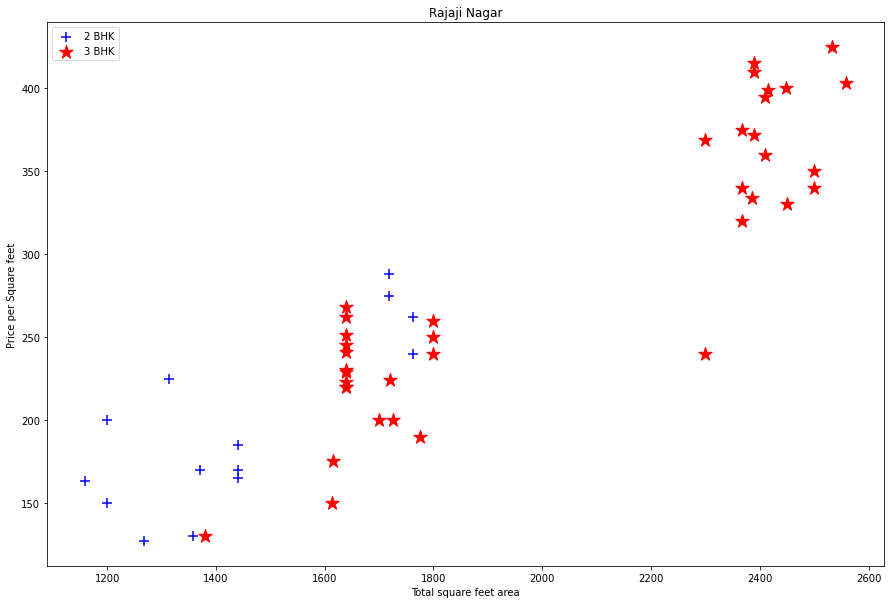

In [165]:
Scatter_plot(df8,"Rajaji Nagar")

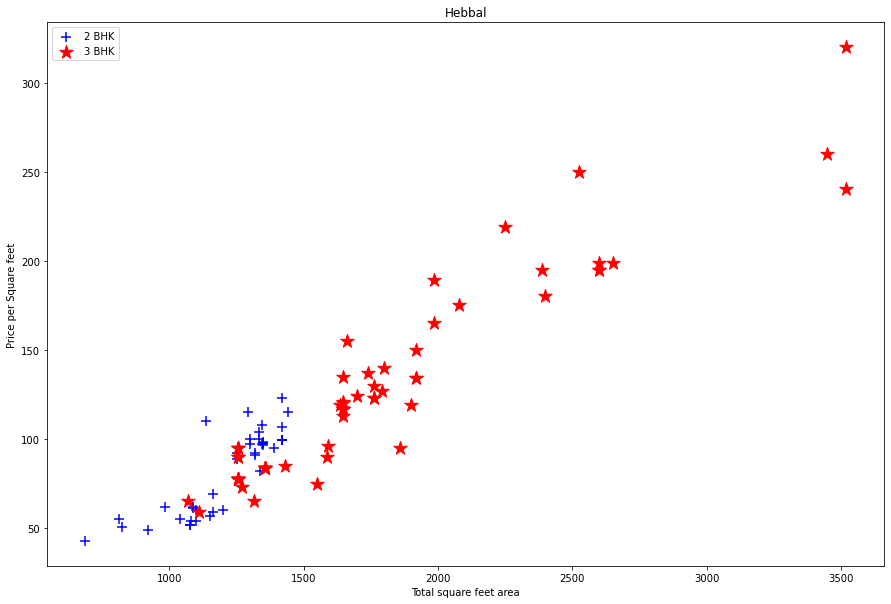

In [166]:
Scatter_plot(df8,"Hebbal")

In [167]:
df8.shape

(10241, 6)

In [168]:
#function to remove all the outlier value where more bhk have price than less bhk at the same location

def remove_outlier_BHK(df):
    excludes = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_dict={}
        for BHK, bhk_df in location_df.groupby("BHK"):
            bhk_dict[BHK] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby("BHK"):
            stat = bhk_dict.get(BHK-1)
            if stat and stat["count"]>5:
                excludes = np.append(excludes,bhk_df[bhk_df.price_per_sqft < (stat["mean"])].index.values)
    return df.drop(excludes,axis="index")
df9 = remove_outlier_BHK(df8)
df9.shape

(7329, 6)

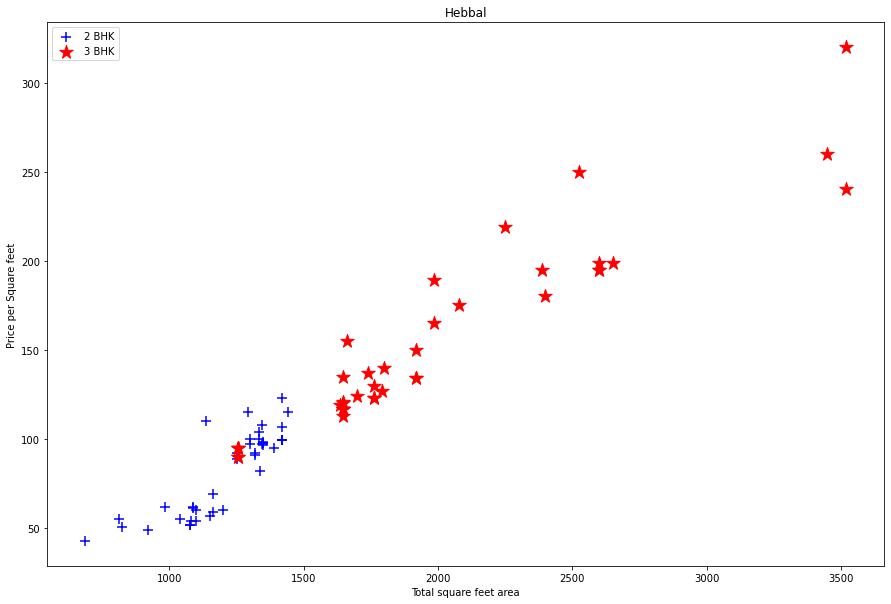

In [169]:
Scatter_plot(df9,"Hebbal")

Text(0, 0.5, 'count')

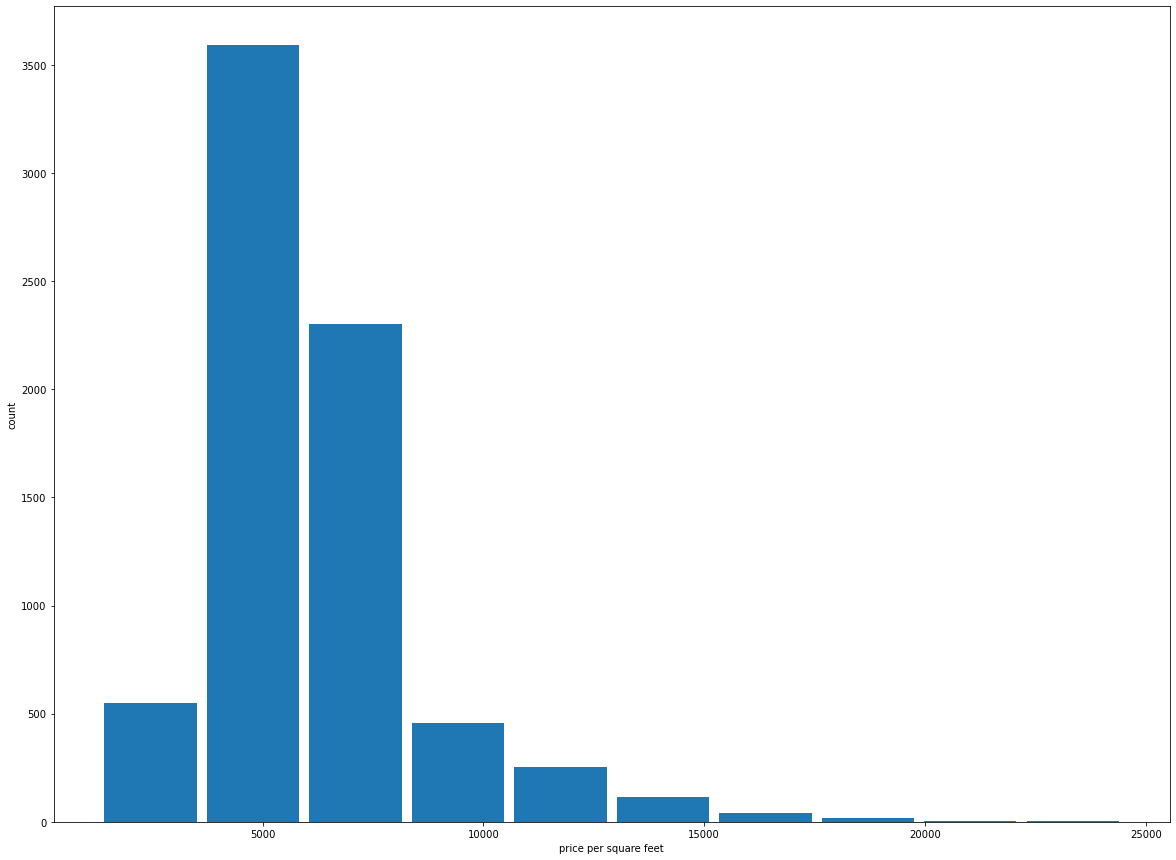

In [170]:
matplt.rcParams["figure.figsize"]=(20,15)
plt.hist(df9.price_per_sqft,rwidth=0.9)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [171]:
df9.head()

location  total_sqft  bath  price  BHK  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668

In [172]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [173]:
df9[df9.bath>10]

location  total_sqft  bath  price  BHK  price_per_sqft
5277  Neeladri Nagar      4000.0  12.0  160.0   10     4000.000000
8486           other     12000.0  12.0  525.0   10     4375.000000
8575           other     10000.0  16.0  550.0   16     5500.000000
9308           other      6000.0  12.0  150.0   11     2500.000000
9639           other      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'count')

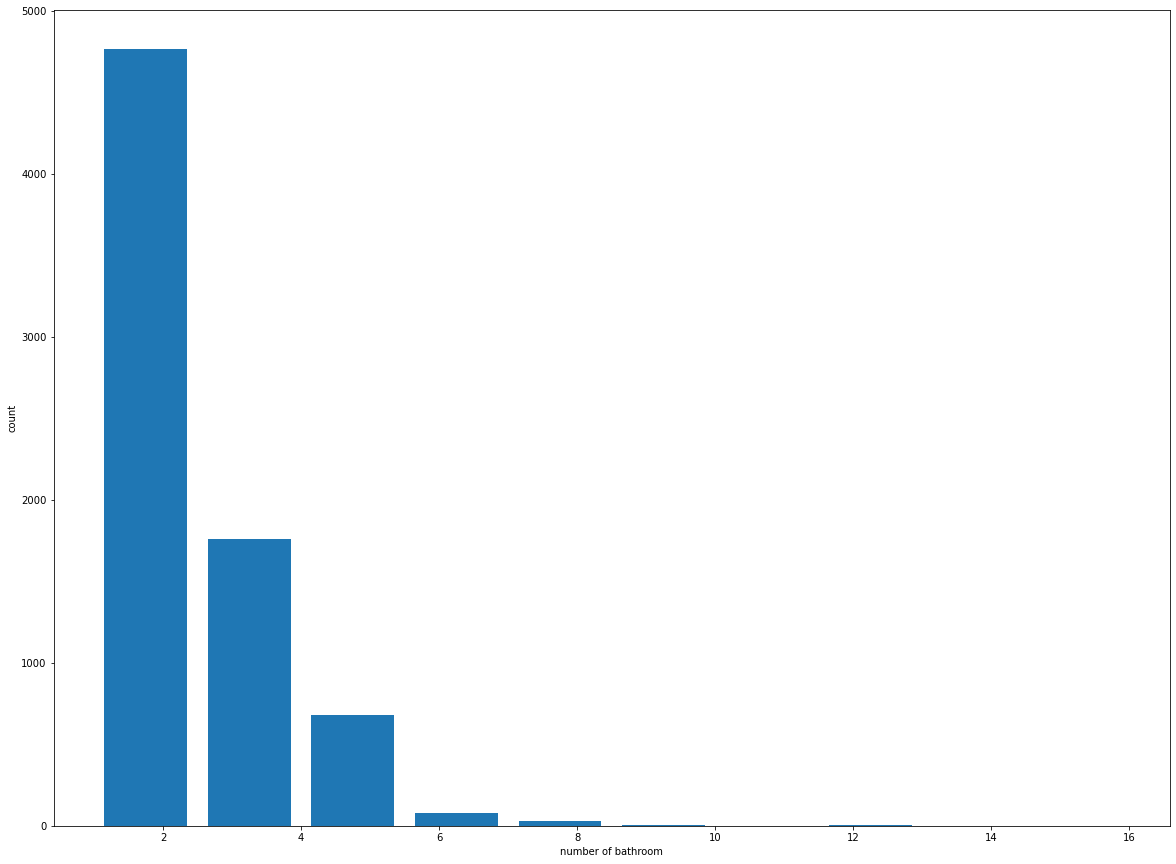

In [174]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("number of bathroom")
plt.ylabel("count")

In [175]:
df9[df9.bath>df9.BHK+2]

location  total_sqft  bath   price  BHK  price_per_sqft
1626  Chikkabanavar      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      1806.0   6.0   116.0    3     6423.034330
8411          other     11338.0   9.0  1000.0    6     8819.897689

In [176]:
df10 = df9[df9.bath<df9.BHK+2]
df10.shape

(7251, 6)

# Model Building

In [177]:
 dumm = pd.get_dummies(df10.location)
 dumm.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 242 columns]

In [178]:
df11 = pd.concat([df10,dumm.drop("other",axis="columns")],axis="columns")
df11.head()

location  total_sqft  bath  price  BHK  price_per_sqft  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860   
1  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491   
2  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333   
3  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333   
4  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668   

   1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 247 columns]

In [179]:
df12 = df11.drop("location",axis="columns")
df12.head()

total_sqft  bath  price  BHK  price_per_sqft  1st Block Jayanagar  \
0      2850.0   4.0  428.0    4    15017.543860                    1   
1      1630.0   3.0  194.0    3    11901.840491                    1   
2      1875.0   2.0  235.0    3    12533.333333                    1   
3      1200.0   2.0  130.0    3    10833.333333                    1   
4      1235.0   2.0  148.0    2    11983.805668                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 246 columns]

In [180]:
X = df12.drop(["price","price_per_sqft"],axis="columns")
X.head()

total_sqft  bath  BHK  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   
3      1200.0   2.0    3                    1                   0   
4      1235.0   2.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   
4                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 244 columns]

In [181]:
Y = df12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [183]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_test,y_test)


0.8452277697874278

In [184]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

data_sample = ShuffleSplit(n_splits = 5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=data_sample)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [185]:
from sklearn.model_selection import GridSearchCV
    
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor

def finding_Best_Model(X,Y):
    algorithms = {
        "linear_regression": {
            "model" : LinearRegression(),
            "params":{
                "normalize": [True,False]
            }
        },
        "lasso" : {
            "model" : Lasso(),
            "params" : {
                "alpha": [1,2],
                "selection": ["random","cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params":{
                "criterion": ["mse","friedman_mse"],
                "splitter" : ["best","random"]
            }
        }
    }
    score =[]
    data_sets = ShuffleSplit(n_splits=5,test_size = 0.2,random_state=0)
    for algorithms_name,configuration in algorithms.items():
        gsv = GridSearchCV(configuration["model"],configuration["params"],cv = data_sets,return_train_score=False)
        gsv.fit(X,Y)
        score.append({
            "model": algorithms_name,
            "best_score" : gsv.best_score_,
            "best_params" : gsv.best_params_
        })
    return pd.DataFrame(score,columns=["model","best_score","best_params"])
finding_Best_Model(X,Y)

model  best_score                               best_params
0  linear_regression    0.818354                      {'normalize': False}
1              lasso    0.687429       {'alpha': 1, 'selection': 'cyclic'}
2      decision_tree    0.711767  {'criterion': 'mse', 'splitter': 'best'}

In [186]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [187]:
np.where(X.columns=="Whitefield")[0][0]

238

In [188]:
def prediction_price(location,sqft,bath,BHK):
    location_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if location_index>=0:
        x[location_index] =1
        return linear.predict([x])[0]
prediction_price('Yelenahalli',1000,2,2)

28.266599774705803

In [189]:
prediction_price('1st Block Jayanagar',1000,2,2)

201.99197906791863

In [190]:
prediction_price("2nd Stage Nagarbhavi",2000,5,3)

275.513575473639

In [205]:
prediction_price('Vishveshwarya Layout',3000,2,5)

153.74704286697232

In [206]:
prediction_price('2nd Stage Nagarbhavi',5000,4,6)

503.36203900967735

In [202]:
prediction_price("Indira Nagar",1000,3,3)

184.58430202033597

In [207]:
import pickle
with open("Bengaluru_House_Data.pickle","wb") as file:
    pickle.dump(linear,file)

In [208]:
import json
columns ={
    "data_columns" : [col.lower() for col in X.columns]
}
with open("columns.json","w") as file:
    file.write(json.dumps(columns))